In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#引入statsmodels的formula公式模块
import statsmodels.formula.api as smf
#引入sklean里面的cross_validation交叉验证模块中的train_test_split训练集测试集拆分函数
from sklearn.cross_validation import train_test_split
#从sklearn的度量模块引入
from sklearn.metrics import mean_squared_error

D:\SOFTWARES\ANACONDA3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#读入广告点击数据
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#查看数据的描述性信息，有数据条数、均值、标准差、最小值、最大值、第一四分位数、第二四分位数、第三四分位数
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#抽样够着训练集合测试集
Train,Test = train_test_split(df, test_size = 0.2, random_state=1234)

In [6]:
Train.size

640

In [7]:
Test.size

160

In [31]:
#建模
# 建模
fit = smf.ols('sales~TV+radio+newspaper', data = Train).fit()
#模型内部参数
# 模型概览的反馈
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     437.8
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           1.01e-75
Time:                        17:05:38   Log-Likelihood:                -308.29
No. Observations:                 160   AIC:                             624.6
Df Residuals:                     156   BIC:                             636.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8497      0.365      7.803      0.000       2.128       3.571
TV             0.0456      0.002     28.648      0.000       0.042       0.049
radio          0.1893      0.009     20.024      0.000       0.171       0.208
newspaper      0.0024      0.007      0.355      0.723      -0.011       0.016
==============================================================================
Omnibus:                       53.472   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.411
Skew:                          -1.353   Prob(JB):                     9.77e-33
Kurtosis:                       6.846   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#上面的newspaper的p>|t|值，大于0.05，说明newspaper这个变量并没有显著影响销售的变动，故应该从模型中剔除
fit2 = smf.ols('sales~TV+radio',data = Train.drop('newspaper',axis=1)).fit()
#模型信息
fit2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.892   
Dependent Variable: sales            AIC:                622.7191
Date:               2017-11-27 17:05 BIC:                631.9446
No. Observations:   160              Log-Likelihood:     -308.36 
Df Model:           2                F-statistic:        660.3   
Df Residuals:       157              Prob (F-statistic): 3.69e-77
R-squared:          0.894            Scale:              2.8166  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    2.9004     0.3352    8.6516   0.0000   2.2382   3.5625
TV           0.0456     0.0016   28.7508   0.0000   0.0424   0.0487
radio        0.1904     0.0089   21.4351   0.0000   0.1729   0.2079
-----------------------------------------------------------------
Omnibus:             54.901       Durbin-Watson:          2.157  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       156.962
Skew:                -1.375       Prob(JB):               0.000  
Kurtosis:            6.998        Condition No.:          429    
=================================================================

"""

In [33]:
#现在模型显著性和参数显著性都得到了通过，现在要验证这两个模型的预测效果
pred = fit.predict(exog = Test)
pred2 = fit2.predict(exog = Test.drop('newspaper',axis=1))
rmes1 = np.sqrt(mean_squared_error(Test.sales,pred))
rmes2 = np.sqrt(mean_squared_error(Test.sales,pred2))

In [34]:
print('rmes1:%s\nrmes2:%s'%(rmes1,rmes2))

rmes1:1.70466742757
rmes2:1.69562075001


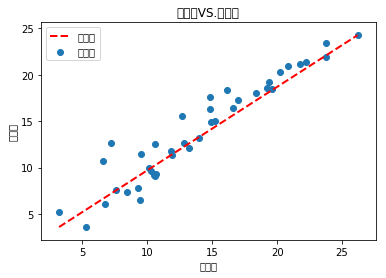

In [44]:
#对于连续值预测效果的好坏，可以借助RMES均方根误差来衡量，RMES越小，模型效果越好
plt.plot([Test.sales.min(), Test.sales.max()], [pred.min(), pred.max()], 'r--', lw=2, label = '拟合线')
plt.scatter(Test.sales, pred, label = '观测点')
plt.title('真实值VS.预测值')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.tick_params(top = 'off', right = 'off')
plt.legend(loc = 'upper left')
plt.show()